In [1]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7861829966251548566
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6794488708198438893
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7797541761869761597
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5507398346740795823
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine


In [2]:
final_review = pd.read_csv("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\final_reviews.csv", index_col = 0)
final_review.head(2)

,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북


In [3]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [4]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x12864e975b0>,
 'caps': [<matplotlib.lines.Line2D at 0x12864e97bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12864e97280>],
 'medians': [<matplotlib.lines.Line2D at 0x12864ea8190>],
 'fliers': [<matplotlib.lines.Line2D at 0x12864ea8520>],
 'means': []}

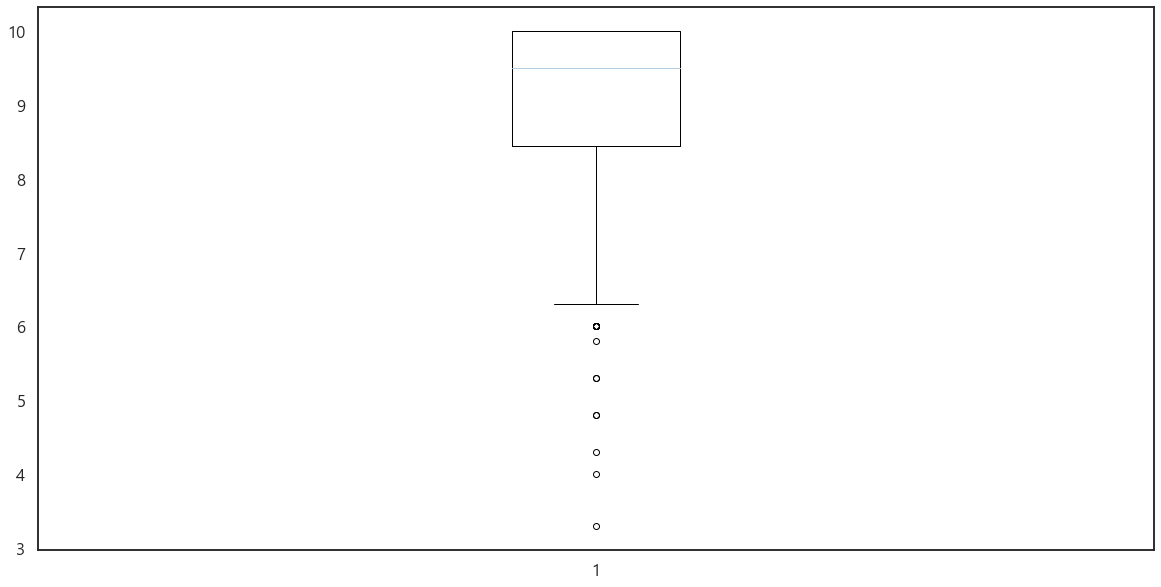

In [5]:
region= df[df['adress'] == '울산']
plt.boxplot(region.stars)

In [6]:
df_more6 = region[region['stars'] >= 8.3]
print(df_more6.shape)
df_more6.head()

(393, 4)


,hospital,stars,reviews,adress
144,창해한의원,10.0,창해 한의원은 시설이 좋습니다 여러 가지 물리치료기계들도 많고 합리적 가격에 침술...,울산
185,못골거북이한의원,9.8,친절하고 꼼꼼하게 봐주세요 증상 하나하나 다 얘기하는동안 기다려주셔서 마음편하게 말...,울산
71,화명한의원,10.0,한의원 원장님께서 진료도 잘 봐주시고 정말정말 친절해서 다음번에도 꼭 화명한의원으로...,울산
72,화명한의원,10.0,몸에 기운이 없어 진료를 받으러 갔고 약을 지었다혓바닥과 눈을 한참 관찰하며 진료하...,울산
73,화명한의원,10.0,허리와 어깨가 아파 방문 했었는데 데스크 직원분께서 제가 첫 방문임에도 불구하고 계...,울산


In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [9]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_14200/3817455113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews'] = df_more6['reviews'].apply(make_noun)


144    [창해, 한의원, 시설, 여러, 가지, 물리치료, 기계, 합리, 가격, 침술, 및,...
185    [증상, 하나, 하나, 얘기, 동안, 마음, 말, 수, 두드러기, 소화, 불량, 무...
71                       [한의원, 원장, 진료, 다음, 번, 꼭, 화, 한의원]
72     [몸, 기운, 진료, 약, 혓바닥, 눈, 한참, 관찰, 진료, 대기, 곳, 피로, ...
73     [허리, 어깨, 방문, 데스크, 직원, 제, 첫, 방문, 임, 불구, 계속, 것, ...
Name: reviews, dtype: object

In [10]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

C:\Users\yukir\AppData\Local\Temp/ipykernel_14200/853035387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]


144    창해 한의원 시설 여러 가지 물리치료 기계 합리 가격 침술 및 물리 치료 수 몸 때...
185    증상 하나 하나 얘기 동안 마음 말 수 두드러기 소화 불량 무릎 통증 곳 군데 약도...
71                                한의원 원장 진료 다음 번 꼭 화 한의원
72                몸 기운 진료 약 혓바닥 눈 한참 관찰 진료 대기 곳 피로 회복 제도
73     허리 어깨 방문 데스크 직원 제 첫 방문 임 불구 계속 것 응대 진료 시간 대기 수...
Name: reviews, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=2000, min_df=2, ngram_range=(1, 6))

In [12]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(393, 1406)

In [13]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1406


['가게', '가격', '가격 간호사', '가격 부담', '가격 생각', '가격 조금', '가기', '가까이', '가능', '가도']

In [14]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

,가게,가격,가격 간호사,가격 부담,가격 생각,가격 조금,가기,가까이,가능,가도,가도 한의원,가도 한의원 검색,가도 한의원 검색 방문,가도 한의원 검색 방문 부위,가도 한의원 검색 방문 부위 스트레칭,가루,가면,가면 기분,가시,가야,가요,가장,가족,가족 모두,가지,간곳,간다,간지,간호,간호사,간호사 모두,간호사 물리치료,간호사 병원,간호사 선생님,간호사 선생님 치료,간호사 설명,간호사 의사,간호사 의사 선생님,간호사 정말,간호사 진료,간호사 진짜,감기,감동,갑자기,강력,강력 추천,강요,강추,개선,개인,...,허준,현대,현상,현재,혈도,협소하,협소합니,혓바닥,호전,혼자,화가,화장실,확인,확인 대기,확인 치료,환경,환약,환자,환자 대기,환자 배려,환자 시간,환자 입장,환자 치료,황금,황금 약손,황금 약손 한의원,회복,회복 위해,회사,회사 근처,효과,효과 계속,효과 다른,효과 다른 이야기,효과 다른 이야기 추천,효과 다른 이야기 추천 방문,효과 다른 이야기 추천 방문 한번,효과 매우,효과 바로,효과 병원,효과 원장,효과 자주,효과 정말,효과 증상,효과 진료,효과 치료,효과 한약,효능,후기,힐링
0,0.0,0.152165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.199557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 1406)


In [16]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(20)

,0
치료,23.191912
진료,21.264226
방문,16.375147
한의원,15.563536
병원,15.561757
원장,15.252034
선생님,14.757743
설명,13.652168
효과,11.575361
직원,11.452480


In [17]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
1401,효과 치료,0.880181
1402,효과 한약,0.681567
1403,효능,0.425804
1404,후기,0.700557
1405,힐링,0.736704


In [18]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(1406, 2)
(1406, 2)


In [19]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
1143,치료,23.191912
1035,진료,21.264226
360,방문,16.375147
1286,한의원,15.563536
419,병원,15.561757
795,원장,15.252034
544,선생님,14.757743
563,설명,13.652168
1386,효과,11.575361
1011,직원,11.452480


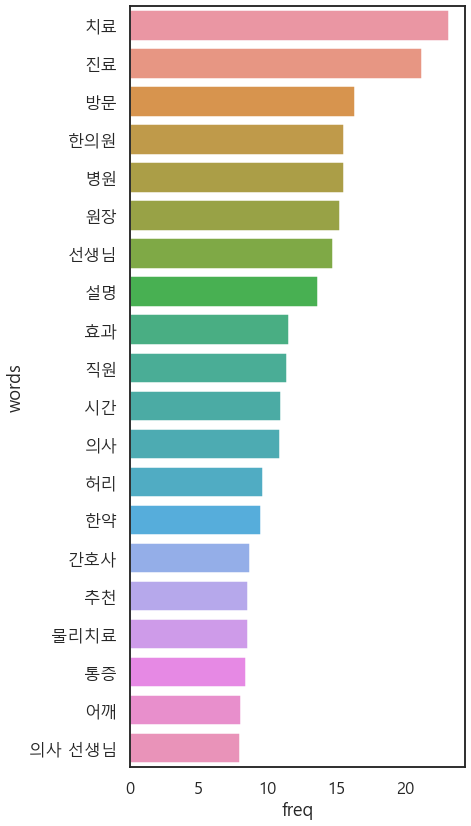

In [20]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,14))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [21]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

In [22]:
words_clean

[('치료', 2),
 ('진료', 4),
 ('방문', 0),
 ('한의원', 0),
 ('병원', 0),
 ('원장', 0),
 ('선생님', 0),
 ('설명', 0),
 ('효과', 0),
 ('직원', 1),
 ('시간', 0),
 ('의사', 0),
 ('허리', 0),
 ('한약', 0),
 ('간호사', 0),
 ('추천', 0),
 ('물리치료', 2),
 ('통증', 0),
 ('어깨', 0),
 ('의사 선생님', 1),
 ('정말', 1),
 ('추나', 1),
 ('대기', 0),
 ('조금', 0),
 ('시설', 1),
 ('생각', 0),
 ('상담', 0),
 ('항상', 0),
 ('환자', 0),
 ('증상', 8),
 ('여기', 1),
 ('대해', 0),
 ('처음', 0),
 ('정도', 1),
 ('모두', 0),
 ('하나', 0),
 ('부분', 1),
 ('상태', 0),
 ('계속', 0),
 ('다른', 0),
 ('예약', 0),
 ('자주', 0),
 ('한의사', 1),
 ('매우', 0),
 ('해주시', 0),
 ('아주', 0),
 ('가격', 0),
 ('처방', 0),
 ('다음', 2),
 ('발목', 2),
 ('진짜', 0),
 ('대기 시간', 1),
 ('소개', 0),
 ('바로', 2),
 ('지인', 1),
 ('느낌', 0),
 ('사람', 0),
 ('금액', 1),
 ('전체', 0),
 ('근처', 2),
 ('방문 의사', 0),
 ('분위기', 0),
 ('때문', 3),
 ('추나 치료', 0),
 ('침술', 0),
 ('한번', 0),
 ('선생님 설명', 0),
 ('다시', 0),
 ('부위', 0),
 ('진맥', 0),
 ('아이', 0),
 ('체질', 2),
 ('도움', 0),
 ('주차장', 0),
 ('말씀', 0),
 ('마음', 0),
 ('안마', 0),
 ('기분', 0),
 ('데스크', 1),
 ('손목', 0),
 ('검사', 4),
 

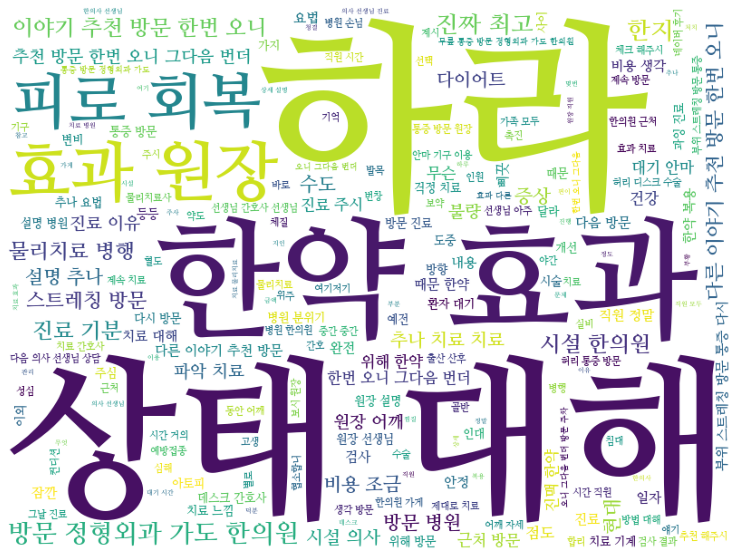

In [23]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **FOR**

In [94]:
j = 0

del_list = []

for num, i in enumerate(words_clean):
    if '가격' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
print(j)
print(len(del_list))       

12 ('가격', 1)
42 ('느낌 가격', 1)
2
2


In [95]:
j =0

for num, i in enumerate(words_clean):
    if '불친절' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
2


In [96]:
j =0

for num, i in enumerate(words_clean):
    if '의사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

25 ('의사', 1)
1
3


In [97]:
j =0

for num, i in enumerate(words_clean):
    if '간호사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
3


In [98]:
j =0

for num, i in enumerate(words_clean):
    if '다이어트' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
3


In [99]:
j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

24 ('대기', 0)
0
4


In [100]:
j =0

for num, i in enumerate(words_clean):
    if '도수' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

34 ('도수', 2)
35 ('도수 치료', 0)
2
6


In [101]:
j =0

for num, i in enumerate(words_clean):
    if '한의원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

3 ('한의원', 0)
0
7


In [102]:
j =0

for num, i in enumerate(words_clean):
    if '물리치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

9 ('물리치료', 0)
29 ('치료 물리치료', 0)
0
9


In [103]:
j =0

for num, i in enumerate(words_clean):
    if '병원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

13 ('병원', 1)
1
10


In [104]:
j =0

for num, i in enumerate(words_clean):
    if '시간' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

14 ('시간', 0)
0
11


In [105]:
j =0

for num, i in enumerate(words_clean):
    if '예약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

11 ('예약', 0)
0
12


In [106]:
j =0

for num, i in enumerate(words_clean):
    if '주사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
12


In [107]:
j =0

for num, i in enumerate(words_clean):
    if '증상' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
12


In [108]:
j =0

for num, i in enumerate(words_clean):
    if '직원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

10 ('직원', 0)
0
13


In [109]:
j =0

for num, i in enumerate(words_clean):
    if '진료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0 ('진료', 1)
37 ('바로 진료', 2)
3
15


In [110]:
j =0

for num, i in enumerate(words_clean):
    if '찜질' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
15


In [111]:
j =0

for num, i in enumerate(words_clean):
    if '처방' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
15


In [112]:
j =0

for num, i in enumerate(words_clean):
    if '처음' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
15


In [113]:
j =0

for num, i in enumerate(words_clean):
    if '치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

1 ('치료', 0)
9 ('물리치료', 0)
29 ('치료 물리치료', 0)
31 ('치료 설명', 0)
35 ('도수 치료', 0)
0
20


In [114]:
j =0

for num, i in enumerate(words_clean):
    if '원장' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
20


In [115]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '선생님' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

21 ('선생님', 0)
0
21


In [116]:
j =0

for num, i in enumerate(words_clean):
    if '한약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
21


In [117]:
j =0

for num, i in enumerate(words_clean):
    if '침' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
21


In [118]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '환자' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

17 ('환자', 0)
0
22


In [119]:
j =0

for num, i in enumerate(words_clean):
    if '효과' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

40 ('효과', 0)
0
23


In [120]:
j =0

for num, i in enumerate(words_clean):
    if '통증' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [121]:
j =0

for num, i in enumerate(words_clean):
    if '상담' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [122]:
j =0

for num, i in enumerate(words_clean):
    if '기분' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [123]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '중심' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [124]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '자기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [125]:
## 내용수정


j =0

for num, i in enumerate(words_clean):
    if '파서' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [126]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '엄마' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [127]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '허름' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [128]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '기도' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
23


In [129]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

24 ('대기', 0)
0
24


In [130]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '거기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
24


In [131]:
del_list = list(map(int, del_list))
new_word_freq = [i for j, i in enumerate(words_clean) if j not in del_list]

In [132]:
19+67

86

In [133]:
adding = ('가격', 24), ('불친절', 21), ('간호사', 41), ('다이어트', 66), ('대기', 86), ('도수', 61), ('물리치료', 59),\
    ('병원', 127), ('시간', 91), ('예약', 54), ('주사', 15), ('증상', 22), ('직원', 44), ('진료', 318),('찜질', 14), ('처방', 29), ('치료', 603),\
        ('의사', 446), ('한약', 62), ('침', 26), ('효과', 74), ('통증', 62), ('상담', 16), ('기분', 22), ('아프다', 78), ('계속', 22), ('엄마', 4),\
            ('허름함', 42)

In [59]:
print(len(new_word_freq))

NameError: name 'new_word_freq' is not defined

In [135]:
for i in adding:
    new_word_freq.append(i)

In [58]:
new_word_freq

NameError: name 'new_word_freq' is not defined

In [136]:
print(len(new_word_freq))

53


In [57]:
new_word_freq = sorted(new_word_freq, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

NameError: name 'new_word_freq' is not defined

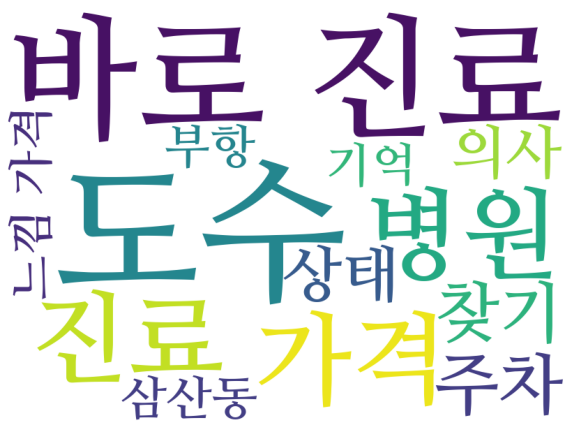

In [153]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [36]:
for_network.head()

,hospital,stars,reviews,adress
144,창해한의원,10.0,"[창해, 한의원, 시설, 여러, 가지, 물리치료, 기계, 합리, 가격, 침술, 및,...",울산
185,못골거북이한의원,9.8,"[증상, 하나, 하나, 얘기, 동안, 마음, 말, 수, 두드러기, 소화, 불량, 무...",울산
71,화명한의원,10.0,"[한의원, 원장, 진료, 다음, 번, 꼭, 화, 한의원]",울산
72,화명한의원,10.0,"[몸, 기운, 진료, 약, 혓바닥, 눈, 한참, 관찰, 진료, 대기, 곳, 피로, ...",울산
73,화명한의원,10.0,"[허리, 어깨, 방문, 데스크, 직원, 제, 첫, 방문, 임, 불구, 계속, 것, ...",울산


In [37]:
network_an = []

for i in for_network.reviews:
    if '하라' in i:
        network_an.append(i)
    if '한약' in i :
        network_an.append(i)
    if '효과' in i :
        network_an.append(i)
    if '상태' in i:
        network_an.append(i)
    if '대해' in i:
        network_an.append(i)
    if '피로' in i:
        network_an.append(i)
    if '회복' in i:
        network_an.append(i)
    # if '순간' in i:
    #     network_an.append(i)
    # if '마음' in i:
    #     network_an.append(i)
    # if '치료' in i:
    #     network_an.append(i)
    # if '간호사' in i:
    #     network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(200, 1)


,reviews
0,"[몸, 기운, 진료, 약, 혓바닥, 눈, 한참, 관찰, 진료, 대기, 곳, 피로, ..."
1,"[몸, 기운, 진료, 약, 혓바닥, 눈, 한참, 관찰, 진료, 대기, 곳, 피로, ..."
2,"[어깨, 한의원, 어깨, 상태, 생각, 좀, 하루, 조금, 진작, 걸, 때]"
3,"[여지, 껏, 한의원, 중, 가장, 효과, 생각, 사실, 주말, 공휴일, 문, 연,..."
4,"[치, 사고, 고, 육아, 목, 디스크, 허리, 디스크, 통증, 추나, 요법, 침,..."


In [43]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.04)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.04)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
144,(효과),0.545,"[((), (효과), 0.545, 1.0)]",1
126,(침),0.485,"[((), (침), 0.485, 1.0)]",1
124,(치료),0.485,"[((), (치료), 0.485, 1.0)]",1
133,(한약),0.395,"[((), (한약), 0.395, 1.0)]",1
135,(한의원),0.390,"[((), (한의원), 0.39, 1.0)]",1


In [44]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
864,"(효과, 침)",0.300,"[((), (효과, 침), 0.3, 1.0), ((침), (효과), 0.618556...",2
846,"(침, 치료)",0.280,"[((), (침, 치료), 0.28, 1.0), ((치료), (침), 0.57731...",2
856,"(효과, 치료)",0.265,"[((), (효과, 치료), 0.265, 1.0), ((치료), (효과), 0.54...",2
803,"(치료, 진료)",0.230,"[((), (치료, 진료), 0.23, 1.0), ((진료), (치료), 0.638...",2
850,"(한의원, 치료)",0.200,"[((), (한의원, 치료), 0.2, 1.0), ((치료), (한의원), 0.41...",2


In [45]:
index= []

for num, i in enumerate (df_network['items']):
    if '하라' in i:
        index.append(num)
    if '한약' in i:
        index.append(num)
    if '효과' in i:
        index.append(num)
    if '상태' in i:
        index.append(num)
    if '대해' in i:
        index.append(num)
    if '피로' in i:
        index.append(num)
    if '회복' in i:
        index.append(num)
    # if '순간' in i:
    #     index.append(num)
    # if '마음' in i:
    #     index.append(num)
    # if '치료' in i:
    #     index.append(num)
    # if '간호사' in i:
    #     index.append(num)

In [46]:
net_an = df_network.iloc[index]
net_an.head()

,items,support,ordered_statistics,length
864,"(효과, 침)",0.300,"[((), (효과, 침), 0.3, 1.0), ((침), (효과), 0.618556...",2
856,"(효과, 치료)",0.265,"[((), (효과, 치료), 0.265, 1.0), ((치료), (효과), 0.54...",2
869,"(한의원, 한약)",0.190,"[((), (한의원, 한약), 0.19, 1.0), ((한약), (한의원), 0.4...",2
871,"(효과, 한약)",0.185,"[((), (효과, 한약), 0.185, 1.0), ((한약), (효과), 0.46...",2
871,"(효과, 한약)",0.185,"[((), (효과, 한약), 0.185, 1.0), ((한약), (효과), 0.46...",2


In [50]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (net_an['items'])
G.add_edges_from(ar)

In [51]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


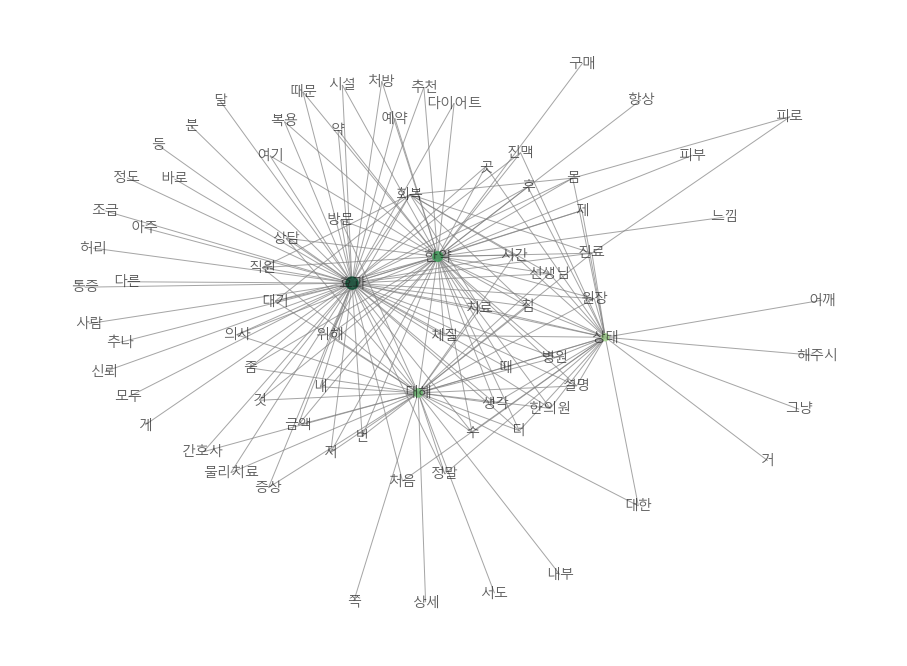

In [52]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family ="Malgun Gothic", font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

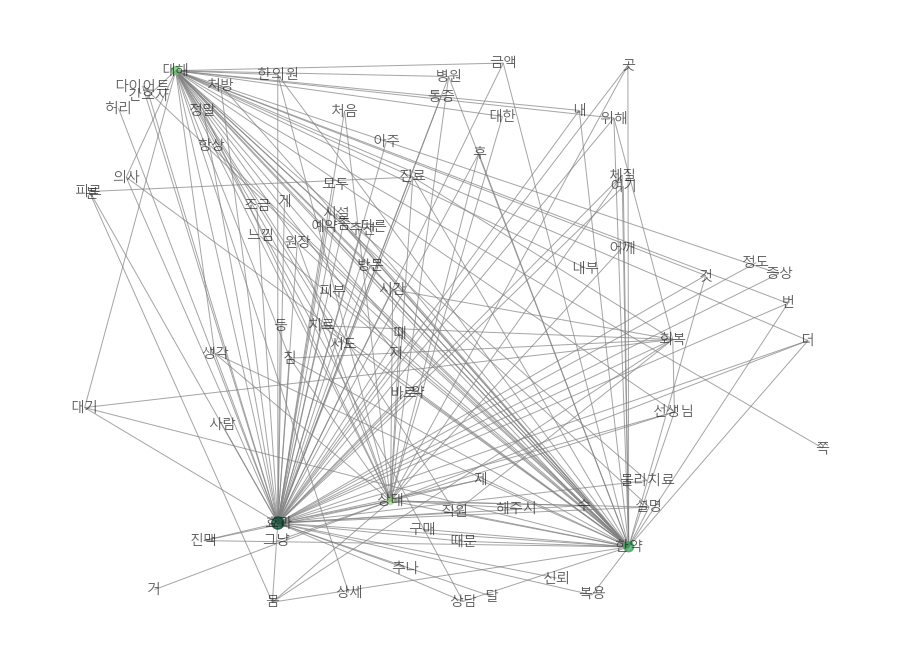

In [53]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

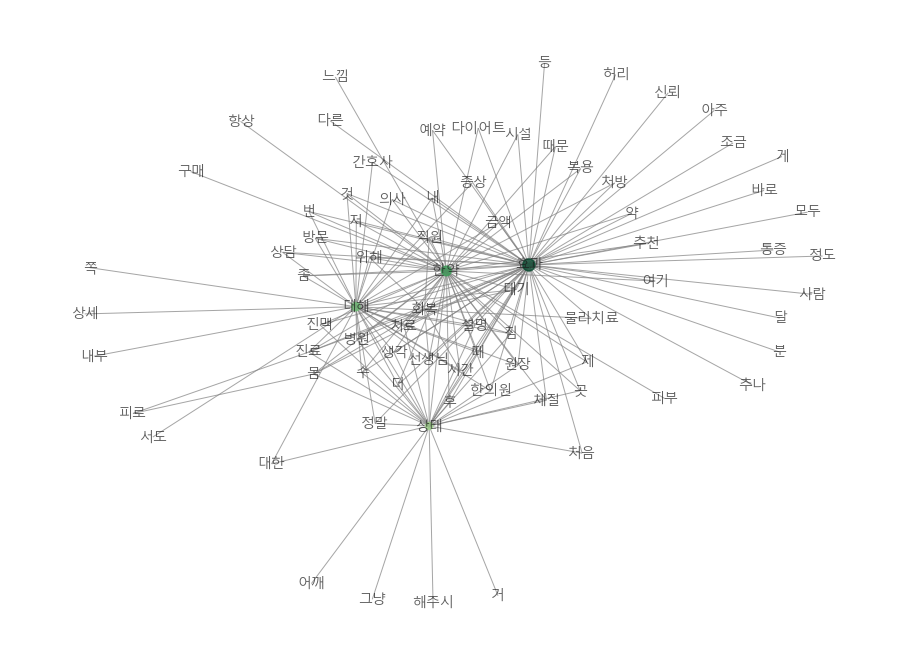

In [54]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

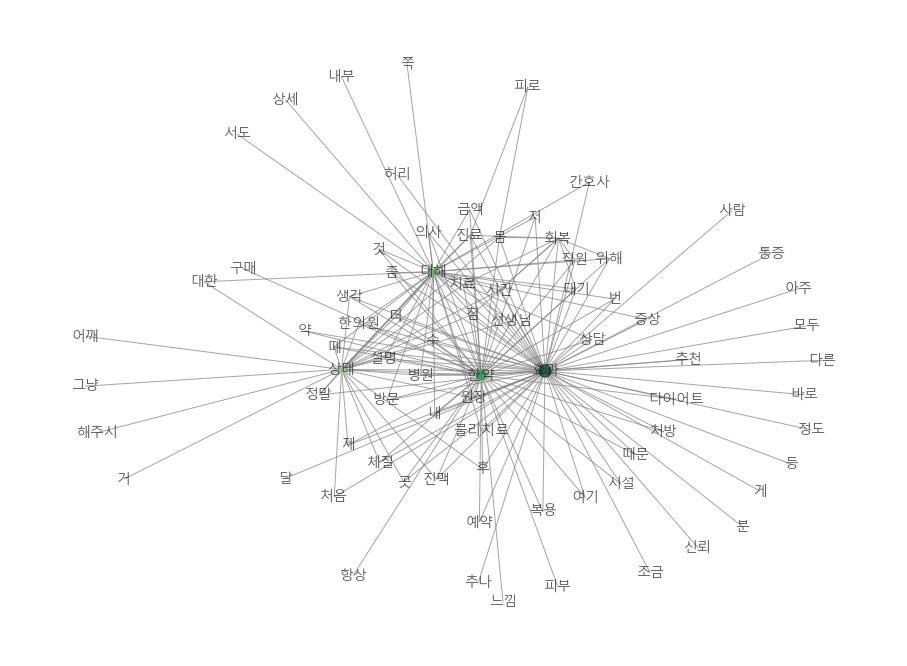

In [55]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)